<a href="https://colab.research.google.com/github/jasonnho/flygaruda-sentiment-analysis/blob/main/notebook/flygaruda_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load Dataset

In [65]:
df_giaarev = pd.read_csv('/content/garuda_reviews.csv')

display(df_giaarev.head())
display(df_giaarev.info())

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,79f3c98f-664e-4de0-8d7e-3f404e95638c,Mr. Chan,https://play-lh.googleusercontent.com/a/ACg8oc...,Harus belajar lagi bagaimana cara kau menghada...,4,0,6.16.0,2025-09-06 00:58:19,NaN,NaN,6.16.0
1,e156da20-58b4-45fe-9197-97bcfa3f541b,Ferdinand Polin,https://play-lh.googleusercontent.com/a/ACg8oc...,"Maskapai MALING, MENIPU customer dengan inform...",1,1,NaN,2025-09-03 09:23:02,NaN,NaN,NaN
2,7a829b34-aa03-4aff-a8fb-15afdf086beb,fauri ari,https://play-lh.googleusercontent.com/a/ACg8oc...,Dulu dpt platinum bs 5-6 tahun g pernah turun....,2,2,6.17.0,2025-08-25 16:38:50,NaN,NaN,6.17.0
3,45e4fbca-10be-4672-9e20-050ed8d8f74b,Hevlind Vanmarbos,https://play-lh.googleusercontent.com/a-/ALV-U...,sy delay 20 jam dgn penerbangan conecting seha...,1,0,6.17.0,2025-08-21 12:06:28,NaN,NaN,6.17.0
4,ab046dbd-cf96-4598-871d-d6bcf185dea1,1IA10_Raja Krisna M,https://play-lh.googleusercontent.com/a-/ALV-U...,Sedikit Panik Setelah Check-in Boarding Tiket ...,4,0,6.17.0,2025-08-18 05:44:32,NaN,NaN,6.17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4851 entries, 0 to 4850
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              4851 non-null   object
 1   userName              4851 non-null   object
 2   userImage             4851 non-null   object
 3   content               4851 non-null   object
 4   score                 4851 non-null   int64 
 5   thumbsUpCount         4851 non-null   int64 
 6   reviewCreatedVersion  3290 non-null   object
 7   at                    4851 non-null   object
 8   replyContent          1513 non-null   object
 9   repliedAt             1513 non-null   object
 10  appVersion            3290 non-null   object
dtypes: int64(2), object(9)
memory usage: 417.0+ KB


None

# Lowercasing

In [66]:
df_giaarev['content'] = df_giaarev['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_giaarev['content'][188])
print(df_giaarev['content'][1])
print(df_giaarev['content'][3831])

aplikasi ini sangat membantu
Maskapai MALING, MENIPU customer dengan informasi palsu, info pada aplikasi tidak ada yang akan expired berapa bulan kedepan, nyatanya miles tiba-tiba sudah terpotong dari beberapa bulan sebelumnya. komplain sampai ber bulan-bulan tidak di response malah jualan perpanjang masa berlaku miles. SCAM!!! komplotan maling sampai aplikasinya pun dibuat demikian buat menjebak customer, hati-hati sama aplikasi busuk ini.
Sangat membantu


In [67]:
#Lowercase all reviews to see the difference
df_giaarev['content']= df_giaarev['content'].apply(lambda x: x.lower())
print(df_giaarev['content'][188])
print(df_giaarev['content'][1])
print(df_giaarev['content'][3831])

aplikasi ini sangat membantu
maskapai maling, menipu customer dengan informasi palsu, info pada aplikasi tidak ada yang akan expired berapa bulan kedepan, nyatanya miles tiba-tiba sudah terpotong dari beberapa bulan sebelumnya. komplain sampai ber bulan-bulan tidak di response malah jualan perpanjang masa berlaku miles. scam!!! komplotan maling sampai aplikasinya pun dibuat demikian buat menjebak customer, hati-hati sama aplikasi busuk ini.
sangat membantu


# Expand Contractions / Normalizations
Tidak ada library untuk normalization Bahasa Indonesia, normalization dilakukan dengan menggunakan dataset yang ditemukan melalui github yang berisi slang serta bentuk formal dari slang. Dataset terbatas pada slang hingga tahun 2018

sc: https://github.com/nasalsabila/kamus-alay

In [68]:
# Load the slang/formal dataset
slang_df = pd.read_csv('/content/colloquial-indonesian-lexicon.csv')

# Create a dictionary mapping slang to formal words
slang_dict = dict(zip(slang_df['slang'], slang_df['formal']))

# Function to replace slang words with formal words
def replace_slang(text, slang_dict):
    words = text.split()
    new_words = []
    for word in words:
        # Check if the word is in the slang dictionary (case-insensitive)
        if word.lower() in slang_dict:
            new_words.append(slang_dict[word.lower()])
        else:
            new_words.append(word)
    return " ".join(new_words)

# Apply slang replacement to the 'content' column
df_giaarev['content_formal'] = df_giaarev['content'].apply(lambda x: replace_slang(x, slang_dict))

display(df_giaarev[['content', 'content_formal']].head())

,content,content_formal
0,harus belajar lagi bagaimana cara kau menghada...,harus belajar lagi bagaimana cara kau menghada...
1,"maskapai maling, menipu customer dengan inform...","maskapai maling, menipu customer dengan inform..."
2,dulu dpt platinum bs 5-6 tahun g pernah turun....,dulu dapat platinum bisa 5-6 tahun enggak pern...
3,sy delay 20 jam dgn penerbangan conecting seha...,saya delay 20 jam dengan penerbangan conecting...
4,sedikit panik setelah check-in boarding tiket ...,sedikit panik setelah check-in boarding tiket ...


# Remove Punctuations

In [69]:
import re
import string

# Function to remove punctuation using re
def remove_punctuation_re(text):
    # Use re.sub to replace all punctuation marks with an empty string
    # string.punctuation contains all common punctuation characters
    return re.sub('[%s]' % re.escape(string.punctuation), '', text)

# Apply punctuation removal using re to the 'content_formal' column
df_giaarev['content_no_punct'] = df_giaarev['content_formal'].apply(lambda x: remove_punctuation_re(x))

display(df_giaarev[['content_formal', 'content_no_punct']].head())

,content_formal,content_no_punct
0,harus belajar lagi bagaimana cara kau menghada...,harus belajar lagi bagaimana cara kau menghada...
1,"maskapai maling, menipu customer dengan inform...",maskapai maling menipu customer dengan informa...
2,dulu dapat platinum bisa 5-6 tahun enggak pern...,dulu dapat platinum bisa 56 tahun enggak perna...
3,saya delay 20 jam dengan penerbangan conecting...,saya delay 20 jam dengan penerbangan conecting...
4,sedikit panik setelah check-in boarding tiket ...,sedikit panik setelah checkin boarding tiket c...


# Tokenization

In [70]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def tokenize_text_nltk(text):
    # Use nltk.word_tokenize to split the text into words
    return nltk.word_tokenize(text)

# Apply NLTK tokenization to the 'content_no_punct' column
df_giaarev['content_tokens'] = df_giaarev['content_no_punct'].astype(str).apply(lambda x: tokenize_text_nltk(x))

display(df_giaarev[['content_no_punct', 'content_tokens']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,content_no_punct,content_tokens
0,harus belajar lagi bagaimana cara kau menghada...,"[harus, belajar, lagi, bagaimana, cara, kau, m..."
1,maskapai maling menipu customer dengan informa...,"[maskapai, maling, menipu, customer, dengan, i..."
2,dulu dapat platinum bisa 56 tahun enggak perna...,"[dulu, dapat, platinum, bisa, 56, tahun, engga..."
3,saya delay 20 jam dengan penerbangan conecting...,"[saya, delay, 20, jam, dengan, penerbangan, co..."
4,sedikit panik setelah checkin boarding tiket c...,"[sedikit, panik, setelah, checkin, boarding, t..."


# Stopwords Removal

In [71]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words_id = set(stopwords.words('indonesian'))

def remove_stopwords_from_tokens(tokens):
    return [word for word in tokens if word.lower() not in stop_words_id]

df_giaarev['content_no_stopwords'] = df_giaarev['content_tokens'].apply(lambda tokens: remove_stopwords_from_tokens(tokens))

display(df_giaarev[['content_tokens', 'content_no_stopwords']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content_tokens,content_no_stopwords
0,"[harus, belajar, lagi, bagaimana, cara, kau, m...","[belajar, kau, menghadapi, kritik, btw, makann..."
1,"[maskapai, maling, menipu, customer, dengan, i...","[maskapai, maling, menipu, customer, informasi..."
2,"[dulu, dapat, platinum, bisa, 56, tahun, engga...","[platinum, 56, turun, kebijakan, megap2, berta..."
3,"[saya, delay, 20, jam, dengan, penerbangan, co...","[delay, 20, jam, penerbangan, conecting, sore,..."
4,"[sedikit, panik, setelah, checkin, boarding, t...","[panik, checkin, boarding, tiket, cuman]"


# Stemming

In [72]:
!pip install Sastrawi

In [73]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Function to stem a list of tokens
def stem_tokens(tokens):
    # Stem each token in the list
    return [stemmer.stem(token) for token in tokens]

# Apply stemming to the column with tokens and no stopwords
df_giaarev['content_stemmed'] = df_giaarev['content_no_stopwords'].apply(lambda tokens: stem_tokens(tokens))

display(df_giaarev[['content_no_stopwords', 'content_stemmed']].head())

,content_no_stopwords,content_stemmed
0,"[belajar, kau, menghadapi, kritik, btw, makann...","[ajar, kau, hadap, kritik, btw, makannmu, enak..."
1,"[maskapai, maling, menipu, customer, informasi...","[maskapai, maling, tipu, customer, informasi, ..."
2,"[platinum, 56, turun, kebijakan, megap2, berta...","[platinum, 56, turun, bijak, megap2, tahan, br..."
3,"[delay, 20, jam, penerbangan, conecting, sore,...","[delay, 20, jam, terbang, conecting, sore, gat..."
4,"[panik, checkin, boarding, tiket, cuman]","[panik, checkin, boarding, tiket, cuman]"


# Frequency Analysis #1

In [74]:
from collections import Counter
import matplotlib.pyplot as plt

,Stemmed Word,Frequency
0,aplikasi,898
1,garuda,834
2,bagus,382
3,good,345
4,indonesia,321
5,bantu,318
6,mudah,295
7,miles,279
8,nya,273
9,baik,261


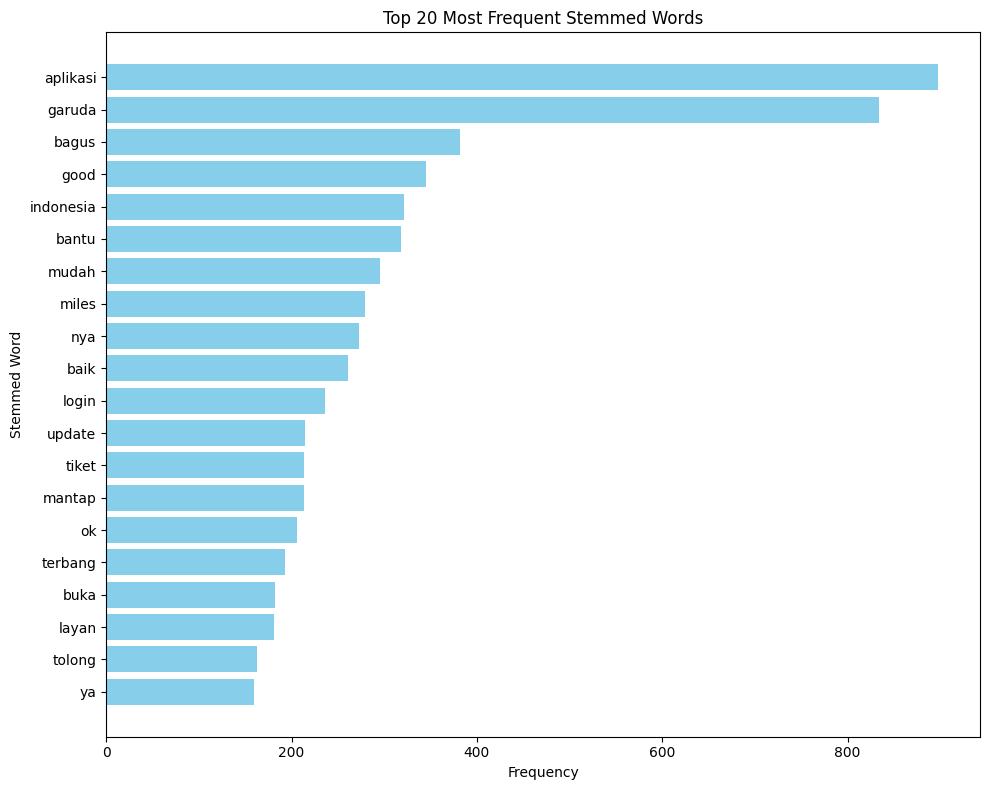

In [75]:
all_stemmed_words = [word for tokens in df_giaarev['content_stemmed'] for word in tokens]

# Count the frequency of each stemmed word
stemmed_word_counts = Counter(all_stemmed_words)

# Get the most common words
most_common_stemmed_words = stemmed_word_counts.most_common(100) # Get top 100 by default

# Convert to DataFrame for better display
stemmed_word_freq_df = pd.DataFrame(most_common_stemmed_words, columns=['Stemmed Word', 'Frequency'])

# Display the most common stemmed words
display(stemmed_word_freq_df.head(20)) # Display top 20

# Select the top 20 most common stemmed words for visualization
top_20_stemmed_words = stemmed_word_freq_df.head(20)

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_20_stemmed_words['Stemmed Word'][::-1], top_20_stemmed_words['Frequency'][::-1], color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Stemmed Word")
plt.title("Top 20 Most Frequent Stemmed Words")
plt.tight_layout()
plt.show()

# Common Words / Stop Words Removal #1

In [76]:
# List of common words to remove
common_words_to_remove = ['aplikasi', 'garuda', 'nya', 'ya']

# Function to remove common words from a list of tokens
def remove_common_words(tokens, common_words):
    return [token for token in tokens if token not in common_words]

# Apply the function to the stemmed content column
df_giaarev['content_stemmed_no_common'] = df_giaarev['content_stemmed'].apply(lambda tokens: remove_common_words(tokens, common_words_to_remove))

# Display the stemmed content before and after removing common words
display(df_giaarev[['content_stemmed', 'content_stemmed_no_common']].head())

,content_stemmed,content_stemmed_no_common
0,"[ajar, kau, hadap, kritik, btw, makannmu, enak...","[ajar, kau, hadap, kritik, btw, makannmu, enak..."
1,"[maskapai, maling, tipu, customer, informasi, ...","[maskapai, maling, tipu, customer, informasi, ..."
2,"[platinum, 56, turun, bijak, megap2, tahan, br...","[platinum, 56, turun, bijak, megap2, tahan, br..."
3,"[delay, 20, jam, terbang, conecting, sore, gat...","[delay, 20, jam, terbang, conecting, sore, gat..."
4,"[panik, checkin, boarding, tiket, cuman]","[panik, checkin, boarding, tiket, cuman]"


# Frequency Analysis #2

,Stemmed Word,Frequency
0,bagus,382
1,good,345
2,indonesia,321
3,bantu,318
4,mudah,295
5,miles,279
6,baik,261
7,login,236
8,update,215
9,tiket,214


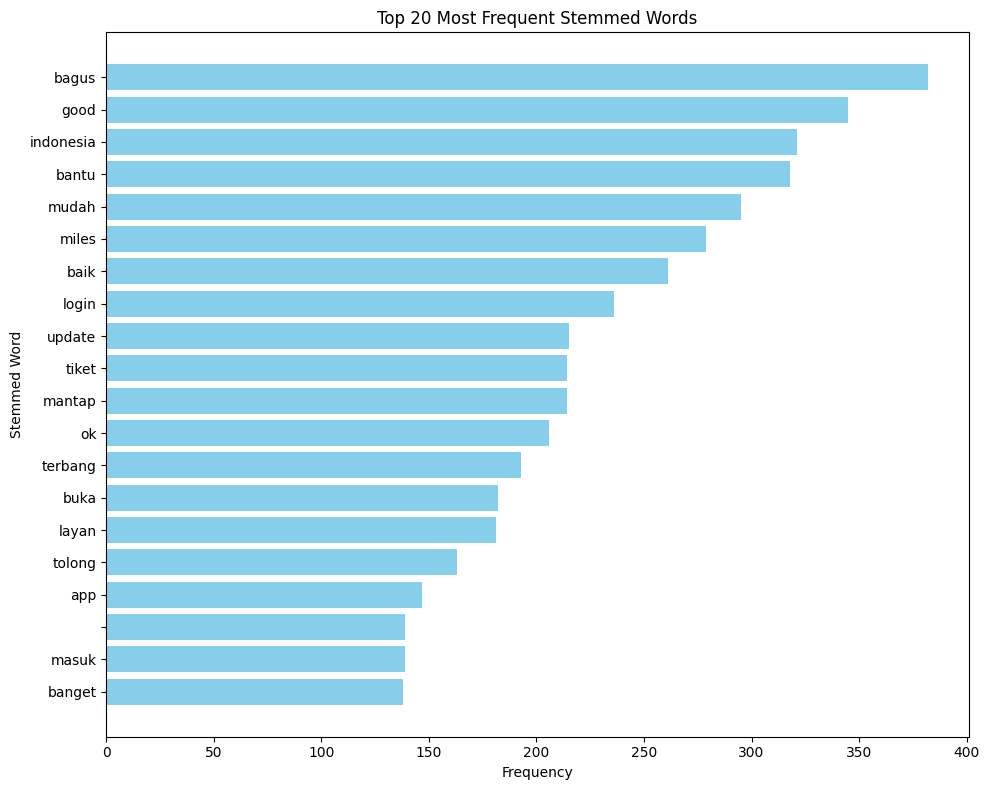

In [77]:
all_stemmed_words = [word for tokens in df_giaarev['content_stemmed_no_common'] for word in tokens]

# Count the frequency of each stemmed word
stemmed_word_counts = Counter(all_stemmed_words)

# Get the most common words
most_common_stemmed_words = stemmed_word_counts.most_common(100) # Get top 100 by default

# Convert to DataFrame for better display
stemmed_word_freq_df = pd.DataFrame(most_common_stemmed_words, columns=['Stemmed Word', 'Frequency'])

# Display the most common stemmed words
display(stemmed_word_freq_df.head(20)) # Display top 20

# Select the top 20 most common stemmed words for visualization
top_20_stemmed_words = stemmed_word_freq_df.head(20)

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_20_stemmed_words['Stemmed Word'][::-1], top_20_stemmed_words['Frequency'][::-1], color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Stemmed Word")
plt.title("Top 20 Most Frequent Stemmed Words")
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Common Words / Stop Words Removal #2

In [78]:
# List of common words to remove
common_words_to_remove = ['app', '']

# Function to remove common words from a list of tokens
def remove_common_words(tokens, common_words):
    return [token for token in tokens if token not in common_words]

# Apply the function to the stemmed content column
df_giaarev['content_stemmed_no_common_2'] = df_giaarev['content_stemmed_no_common'].apply(lambda tokens: remove_common_words(tokens, common_words_to_remove))

# Display the stemmed content before and after removing common words
display(df_giaarev[['content_stemmed_no_common', 'content_stemmed_no_common_2']].head())

,content_stemmed_no_common,content_stemmed_no_common_2
0,"[ajar, kau, hadap, kritik, btw, makannmu, enak...","[ajar, kau, hadap, kritik, btw, makannmu, enak..."
1,"[maskapai, maling, tipu, customer, informasi, ...","[maskapai, maling, tipu, customer, informasi, ..."
2,"[platinum, 56, turun, bijak, megap2, tahan, br...","[platinum, 56, turun, bijak, megap2, tahan, br..."
3,"[delay, 20, jam, terbang, conecting, sore, gat...","[delay, 20, jam, terbang, conecting, sore, gat..."
4,"[panik, checkin, boarding, tiket, cuman]","[panik, checkin, boarding, tiket, cuman]"


#Frequency Analysis #3

,Stemmed Word,Frequency
0,bagus,382
1,good,345
2,indonesia,321
3,bantu,318
4,mudah,295
5,miles,279
6,baik,261
7,login,236
8,update,215
9,tiket,214


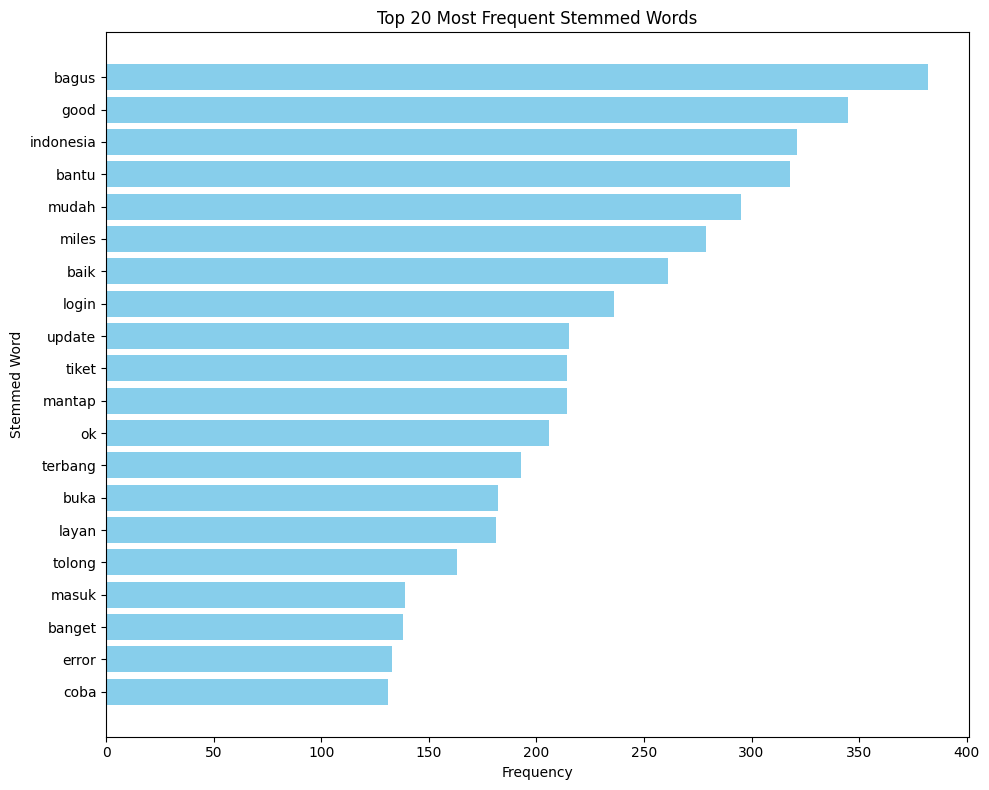

In [79]:
all_stemmed_words = [word for tokens in df_giaarev['content_stemmed_no_common_2'] for word in tokens]

# Count the frequency of each stemmed word
stemmed_word_counts = Counter(all_stemmed_words)

# Get the most common words
most_common_stemmed_words = stemmed_word_counts.most_common(100) # Get top 100 by default

# Convert to DataFrame for better display
stemmed_word_freq_df = pd.DataFrame(most_common_stemmed_words, columns=['Stemmed Word', 'Frequency'])

# Display the most common stemmed words
display(stemmed_word_freq_df.head(20)) # Display top 20

# Select the top 20 most common stemmed words for visualization
top_20_stemmed_words = stemmed_word_freq_df.head(20)

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_20_stemmed_words['Stemmed Word'][::-1], top_20_stemmed_words['Frequency'][::-1], color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Stemmed Word")
plt.title("Top 20 Most Frequent Stemmed Words")
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Rare Word Analysis

In [85]:
# Get the least common words
least_common_stemmed_words = stemmed_word_counts.most_common()[:-41:-1]

# Convert to DataFrame for better display
least_common_stemmed_word_freq_df = pd.DataFrame(least_common_stemmed_words, columns=['Stemmed Word', 'Frequency'])

# Display the least common stemmed words
display(least_common_stemmed_word_freq_df.head(40))

,Stemmed Word,Frequency
0,edisi,1
1,airlens,1
2,gooddddddd,1
3,membantuutk,1
4,sukagood,1
5,bagussaya,1
6,idea,1
7,arrange,1
8,flag,1
9,nyamaaaannnn,1


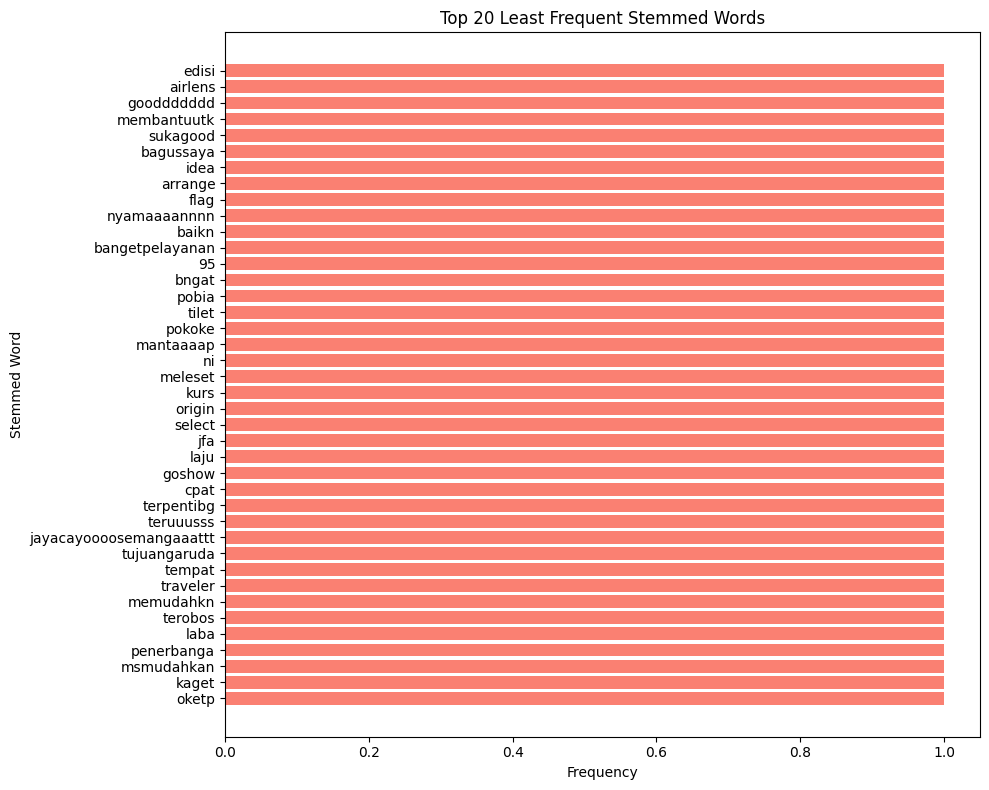

In [84]:
top_20_least_common_stemmed_words = least_common_stemmed_word_freq_df.head(40)

plt.figure(figsize=(10, 8))
# Reverse the order for the plot to have the lowest frequency at the bottom
plt.barh(top_20_least_common_stemmed_words['Stemmed Word'][::-1], top_20_least_common_stemmed_words['Frequency'][::-1], color='salmon')
plt.xlabel("Frequency")
plt.ylabel("Stemmed Word")
plt.title("Top 20 Least Frequent Stemmed Words")
plt.tight_layout()
plt.show()

In [86]:
# Select the desired columns, including the original content and the most cleaned content
df_cleaned = df_giaarev[['content', 'content_stemmed_no_common_2', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']].copy()
output_file_path = 'cleaned_garuda_reviews.csv'
df_cleaned.to_csv(output_file_path, index=False)

Cleaned data saved to cleaned_garuda_reviews.csv
